In [11]:
# ----------------------------------------------
# Final_Project_Showz_LTV_CAC.ipynb
# Evaluación final de modelos guardados
# ----------------------------------------------

import os
import sys
import pandas as pd
import joblib

# Agregar src/ al path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from src.evaluation import evaluate_all, evaluate_model


# 1. Cargar dataset y test sets para ambos targets
df = pd.read_csv("../data/processed/final_dataset.csv", parse_dates=["first_session"])
df = df[df["first_session"] < "2018-07-01"]

## -------- LTV
ltv_df = df[~df["LTV_180"].isna()]
ltv_test = ltv_df[(ltv_df["first_session"] >= "2018-01-01") & (ltv_df["first_session"] < "2018-07-01")]

ltv_X = ltv_test.drop(columns=['uid', 'first_session', 'last_session', 'first_order', 'last_order',
                               'LTV_180', 'CAC_source_30', 'ltv_cohort_avg', 'cac_cohort_avg', 'conversion_rate_cohort'],
                     errors='ignore')
ltv_y = ltv_test["LTV_180"]

## -------- CAC
cac_df = df[~df["CAC_source_30"].isna()]
cac_test = cac_df[(cac_df["first_session"] >= "2018-01-01") & (cac_df["first_session"] < "2018-07-01")]

cac_X = cac_test.drop(columns=['uid', 'first_session', 'last_session', 'first_order', 'last_order',
                               'LTV_180', 'CAC_source_30', 'ltv_cohort_avg', 'cac_cohort_avg', 'conversion_rate_cohort'],
                     errors='ignore')
cac_y = cac_test["CAC_source_30"]

# 2. Cargar modelos guardados
def load_models(folder: str, target: str):
    models = {}
    for file in os.listdir(folder):
        if target in file and file.endswith(".pkl"):
            name = file.replace(f"{target}_", "").replace(".pkl", "")
            path = os.path.join(folder, file)
            models[name] = joblib.load(path)
    return models

ltv_models = load_models("../models/", "LTV_180")
cac_models = load_models("../models/", "CAC_source_30")

# 3. Evaluar modelos
print(" Evaluación LTV_180")
ltv_results = evaluate_all(ltv_models, ltv_X, ltv_y)
display(ltv_results.sort_values("MAPE"))

print(" Evaluación CAC_source_30")
cac_results = evaluate_all(cac_models, cac_X, cac_y)
display(cac_results.sort_values("MAPE"))


W0505 18:59:36.385987 71437 warnings.py:110] /Users/lucianavaldivieso/Code/Universidad/Data_mining/Proyecto_Final/.venv/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.3.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(

W0505 18:59:36.387948 71437 warnings.py:110] /Users/lucianavaldivieso/Code/Universidad/Data_mining/Proyecto_Final/.venv/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.wa

 Evaluación LTV_180
⚠️ Error evaluando rf: 'DecisionTreeRegressor' object has no attribute 'monotonic_cst'
⚠️ Error evaluando stacking: 'DecisionTreeRegressor' object has no attribute 'monotonic_cst'


,MAE,RMSE,MAPE
Model,,,
ridge,3.365379e+00,5.000137e+00,inf
linear,3.367232e+00,5.001680e+00,inf
lgb,9.007629e-01,1.670699e+01,inf
sgd,5.315218e+07,9.095173e+07,inf
cat,5.630792e-01,1.431541e+01,inf
xgb,2.067227e-01,3.923824e+00,inf


 Evaluación CAC_source_30
⚠️ Error evaluando rf: 'DecisionTreeRegressor' object has no attribute 'monotonic_cst'
⚠️ Error evaluando stacking: 'DecisionTreeRegressor' object has no attribute 'monotonic_cst'


W0505 18:59:39.733288 71437 warnings.py:110] /Users/lucianavaldivieso/Code/Universidad/Data_mining/Proyecto_Final/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



,MAE,RMSE,MAPE
Model,,,
ridge,3.062654e+03,4.101982e+03,inf
xgb,2.544558e+03,3.566678e+03,inf
cat,2.567639e+03,3.644631e+03,inf
sgd,4.636556e+06,1.862134e+07,inf
linear,3.062504e+03,4.101819e+03,inf
lgb,2.582824e+03,3.649315e+03,inf


# Validación y Selección

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

[CV] END model__learning_rate=0.03, model__max_depth=2, model__n_estimators=300; total time=   6.2s
[CV] END model__learning_rate=0.03, model__max_depth=2, model__n_estimators=400; total time=   8.2s
[CV] END model__learning_rate=0.03, model__max_depth=3, model__n_estimators=200; total time=  11.9s
[CV] END model__learning_rate=0.03, model__max_depth=3, model__n_estimators=400; total time=  12.8s
[CV] END model__learning_rate=0.03, model__max_depth=4, model__n_estimators=200; total time=  17.8s
[CV] END model__learning_rate=0.03, model__max_depth=4, model__n_estimators=400; total time=  16.4s
[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=300; total time=   4.0s
[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=300; total time=  12.1s
[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=400; total time=  30.2s
[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=400; total time=  20.0s


In [15]:

df = pd.read_csv("../data/processed/final_dataset.csv", parse_dates=["first_session"])
df = df[df["first_session"] < "2018-07-01"]
ltv_df = df[~df["LTV_180"].isna()]   # registros con target

train_mask = ltv_df["first_session"] < "2018-01-01"             # 2017
X_train = ltv_df.loc[train_mask].drop(
            columns=['uid', 'first_session', 'last_session',
                     'first_order', 'last_order', 'LTV_180',
                     'CAC_source_30', 'ltv_cohort_avg',
                     'cac_cohort_avg', 'conversion_rate_cohort'],
            errors='ignore')
y_train = ltv_df.loc[train_mask, "LTV_180"]

# ──────────────────────────────────────────────
# Preprocesamiento + imputación + escala + OHE

num_cols = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

numeric_tf = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
])

categoric_tf = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
        ('num', numeric_tf, num_cols),
        ('cat', categoric_tf, cat_cols)
])

gbr = GradientBoostingRegressor(random_state=42)

full_pipe = Pipeline([
        ('preprocess', preprocess),
        ('model', gbr)
])

tscv = TimeSeriesSplit(n_splits=5)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

param_grid = {
    "model__n_estimators": [200, 300, 400],
    "model__learning_rate": [0.03, 0.05, 0.1],
    "model__max_depth": [2, 3, 4]
}

gsearch = GridSearchCV(
    estimator=full_pipe,
    param_grid=param_grid,
    cv=tscv,
    scoring=mae_scorer,
    n_jobs=-1,
    verbose=2,
    refit=True
)

# Entrenar búsqueda
gsearch.fit(X_train, y_train)

print(f"Mejor MAE (CV, negativo): {gsearch.best_score_:.4f}")
print("Mejores hiperparámetros:", gsearch.best_params_)


cv_results = pd.DataFrame(gsearch.cv_results_)
cv_results.to_csv("../data/processed/cv_results_ltv_tscv.csv", index=False)

best_ltv_model = gsearch.best_estimator_
joblib.dump(best_ltv_model, "../models/LTV_180_best_tscv.pkl")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejor MAE (CV, negativo): -1.2106
Mejores hiperparámetros: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 400}


['../models/LTV_180_best_tscv.pkl']

In [17]:

df = pd.read_csv("../data/processed/final_dataset.csv", parse_dates=["first_session"])
df = df[df["first_session"] < "2018-07-01"]
  # registros con target
cac_df = df[~df["CAC_source_30"].isna()]
train_mask = cac_df["first_session"] < "2018-01-01"
          # 2017
X_train = cac_df.loc[train_mask].drop(
            columns=['uid', 'first_session', 'last_session',
                     'first_order', 'last_order', 'LTV_180',
                     'CAC_source_30', 'ltv_cohort_avg',
                     'cac_cohort_avg', 'conversion_rate_cohort'],
            errors='ignore')
y_train = cac_df.loc[train_mask, "CAC_source_30"]

# ──────────────────────────────────────────────
# Preprocesamiento + imputación + escala + OHE

num_cols = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

numeric_tf = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
])

categoric_tf = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
        ('num', numeric_tf, num_cols),
        ('cat', categoric_tf, cat_cols)
])

gbr = GradientBoostingRegressor(random_state=42)

full_pipe = Pipeline([
        ('preprocess', preprocess),
        ('model', gbr)
])

tscv = TimeSeriesSplit(n_splits=5)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

param_grid = {
    "model__n_estimators": [200, 300, 400],
    "model__learning_rate": [0.03, 0.05, 0.1],
    "model__max_depth": [2, 3, 4]
}

gsearch = GridSearchCV(
    estimator=full_pipe,
    param_grid=param_grid,
    cv=tscv,
    scoring=mae_scorer,
    n_jobs=-1,
    verbose=2,
    refit=True
)

# Entrenar búsqueda
gsearch.fit(X_train, y_train)

print(f"Mejor MAE (CV, negativo): {gsearch.best_score_:.4f}")
print("Mejores hiperparámetros:", gsearch.best_params_)


cv_results = pd.DataFrame(gsearch.cv_results_)
cv_results.to_csv("../data/processed/cv_results_cac_tscv.csv", index=False)

best_cac_model = gsearch.best_estimator_
joblib.dump(best_cac_model, "../models/CAC_source_30_best_tscv.pkl")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejor MAE (CV, negativo): -1682.9959
Mejores hiperparámetros: {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}


['../models/CAC_source_30_best_tscv.pkl']

# Explicabilidad y Diagnostico

In [18]:

best_ltv_model = joblib.load("../models/LTV_180_best_tscv.pkl")

# Dataset ya cargado antes  ltv_test, ltv_X, ltv_y
assert "ltv_X" in globals(), "Ejecuta primero la celda del Paso 1 para definir ltv_X"

# Obtener nombres de features después del ColumnTransformer
feature_names = best_ltv_model.named_steps["preprocess"].get_feature_names_out()


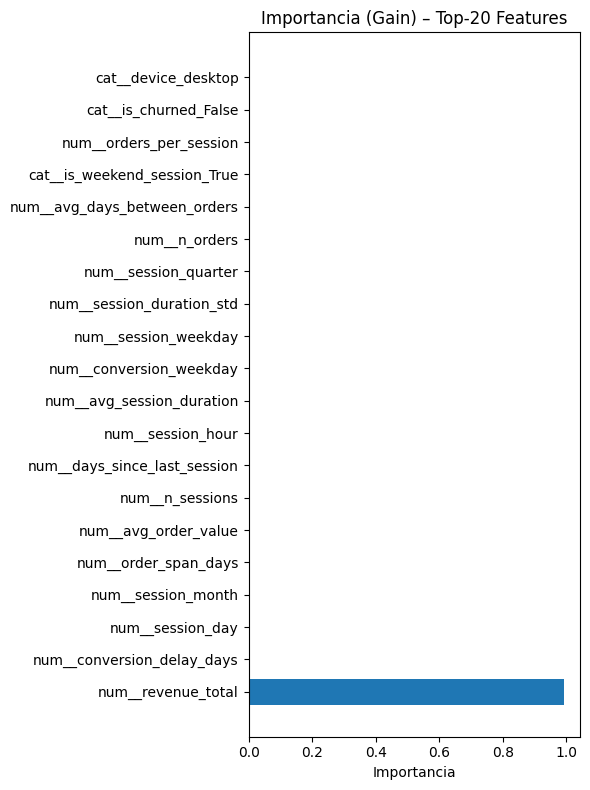

In [21]:
importances = best_ltv_model.named_steps["model"].feature_importances_
idx_sorted  = np.argsort(importances)[::-1][:20]          # top‑20

plt.figure(figsize=(6, 8))
plt.barh(range(len(idx_sorted))[::-1], importances[idx_sorted])
plt.yticks(range(len(idx_sorted))[::-1], feature_names[idx_sorted])
plt.title("Importancia (Gain) – Top‑20 Features")
plt.xlabel("Importancia")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


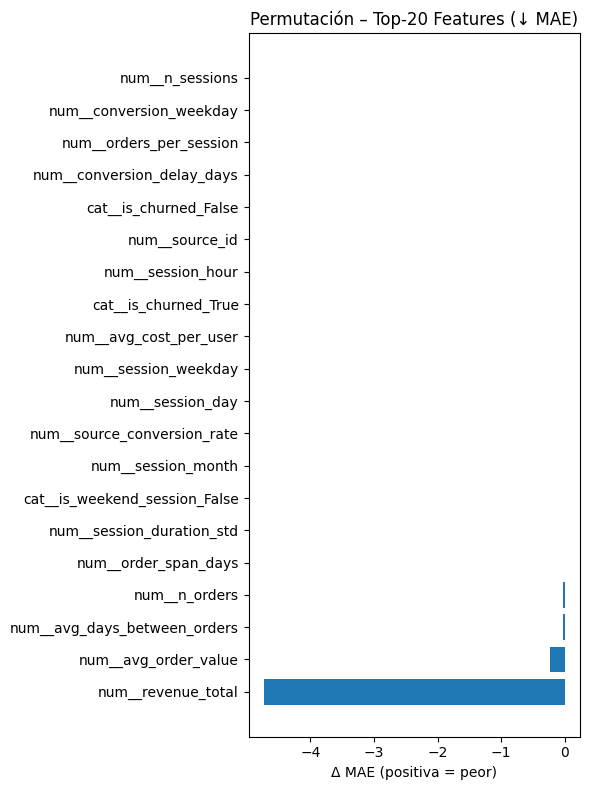

In [22]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, make_scorer

perm = permutation_importance(
    best_ltv_model, ltv_X, ltv_y,
    n_repeats=10,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    n_jobs=-1,
    random_state=42
)

idx_perm = np.argsort(perm.importances_mean)[::-1][:20]

plt.figure(figsize=(6, 8))
plt.barh(range(len(idx_perm))[::-1], -perm.importances_mean[idx_perm])  # neg → pos
plt.yticks(range(len(idx_perm))[::-1], feature_names[idx_perm])
plt.title("Permutación – Top‑20 Features (↓ MAE)")
plt.xlabel("Δ MAE (positiva = peor)")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


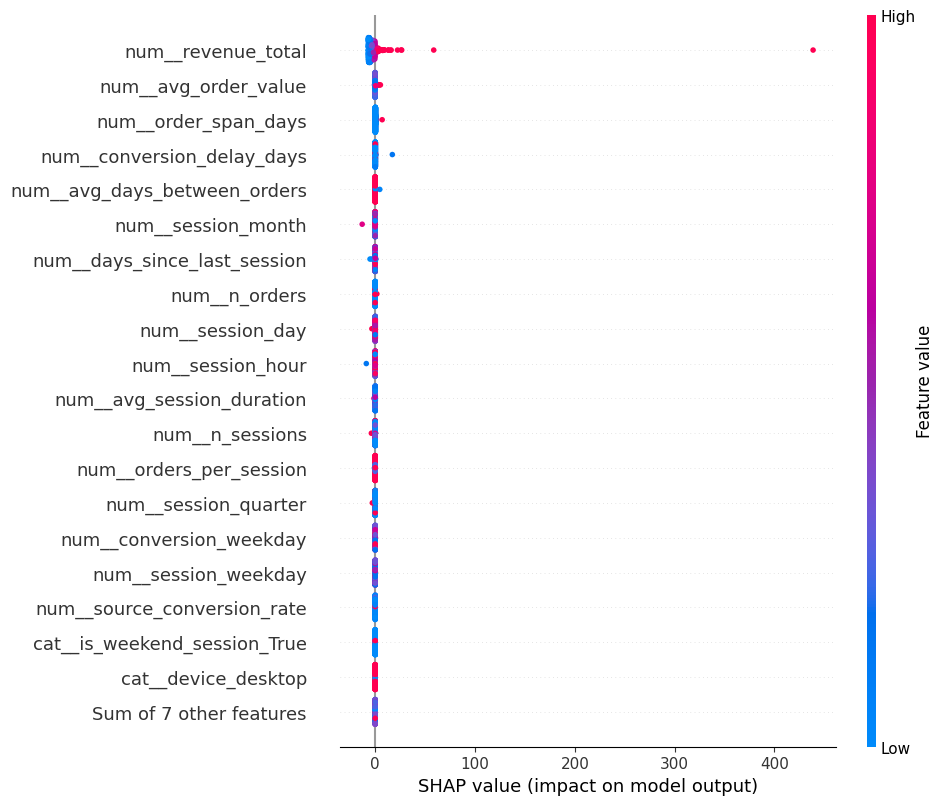

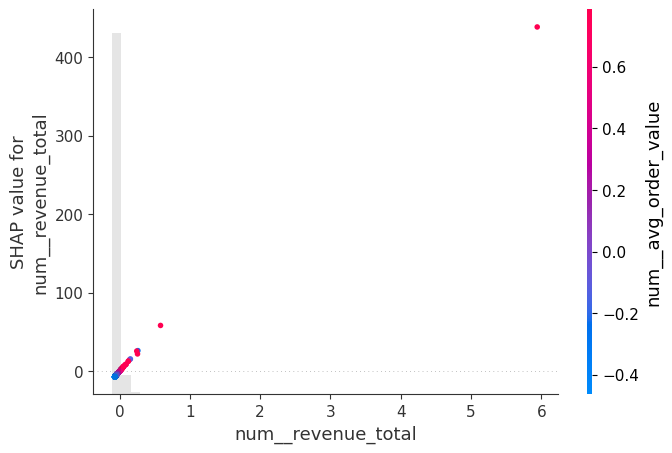

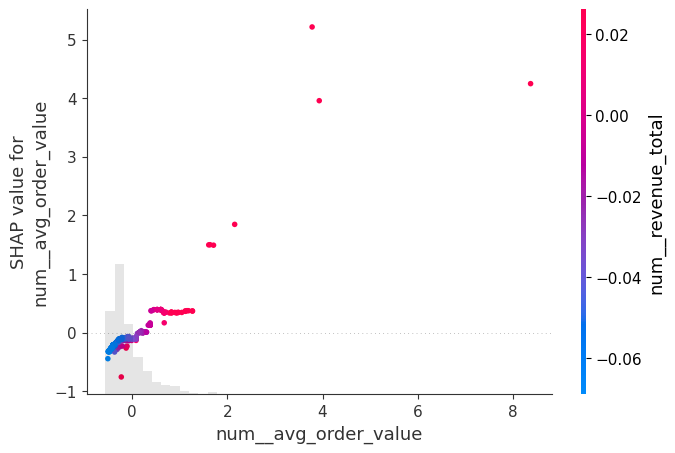

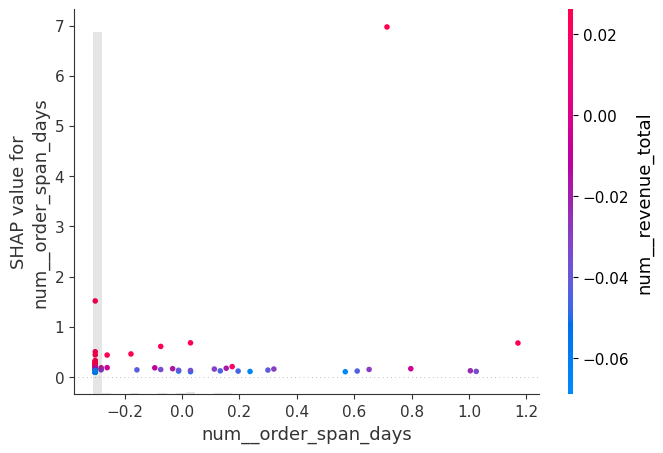

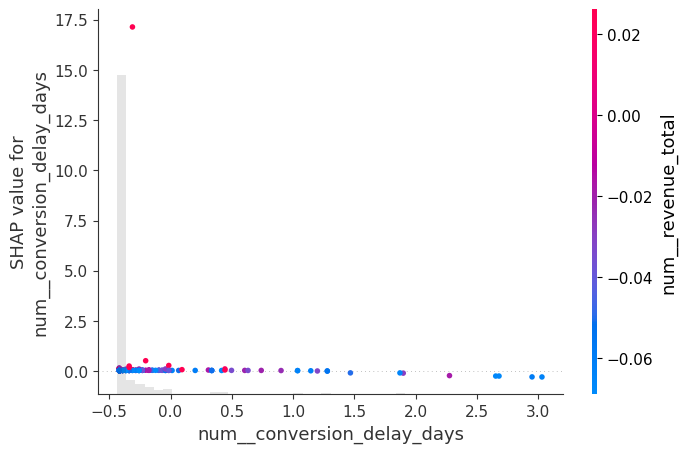

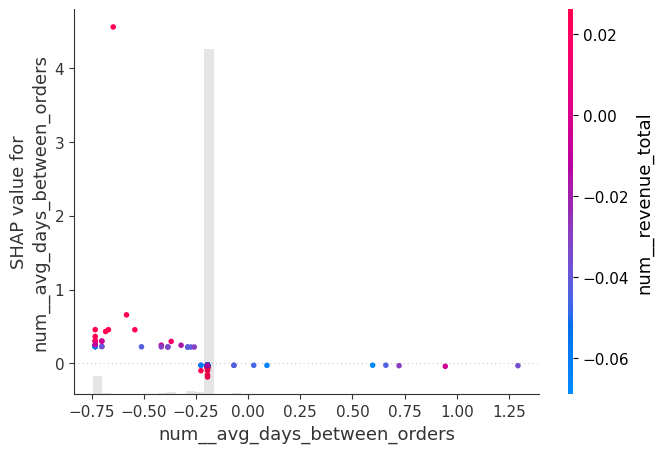

In [28]:

import shap

#  Separar pasos del Pipeline
preprocess   = best_ltv_model.named_steps["preprocess"]
inner_model  = best_ltv_model.named_steps["model"]        # GradientBoostingRegressor

#   Tomar muestra para explicación (500 obs ≈ rápido y estable)
X_sample_raw = ltv_X.sample(n=500, random_state=42)

#   Transformar la muestra → matriz numérica
X_sample_num = preprocess.transform(X_sample_raw)

#⃣  Obtener nombres de columnas después de OHE/escala
feature_names = preprocess.get_feature_names_out()

#   Convertir a DataFrame para que los gráficos muestren etiquetas
X_sample_num_df = pd.DataFrame(X_sample_num, columns=feature_names)

#  Crear TreeExplainer (optimizado para modelos de árbol)
explainer   = shap.TreeExplainer(inner_model)
shap_values = explainer(X_sample_num_df)

#   Plot global (beeswarm)
shap.plots.beeswarm(shap_values, max_display=20)

#   Plots de dependencia para las 5 variables más influyentes
top_idx = np.argsort(np.abs(shap_values.values).mean(0))[::-1][:5]
for i in top_idx:
    shap.plots.scatter(
        shap_values[:, i],
        color=shap_values,
        show=True               # fuerza despliegue individual en notebooks antiguo
    )


In [30]:
ltv_test = ltv_test.copy()
ltv_test["pred"]   = best_ltv_model.predict(ltv_X)
ltv_test["absErr"] = np.abs(ltv_test["pred"] - ltv_test["LTV_180"])

segment_cols = ["device", "source", "country"]          # ⟵ las que te interesen
segment_cols = [c for c in segment_cols if c in ltv_test.columns]  # filtra disponibles

for col in segment_cols:
    seg = (
        ltv_test.groupby(col)["absErr"]
                .mean()
                .sort_values(ascending=False)
                .to_frame("MAE_segmento")
                .head(10)
    )
    print(f"\n--- MAE por {col} ---")
    display(seg)



--- MAE por device ---


,MAE_segmento
device,
desktop,0.204212
touch,0.121920


CAC

In [31]:

# Cargar modelo óptimo
best_cac_model = joblib.load("../models/CAC_source_30_best_tscv.pkl")

# Crear set de prueba (H1‑2018) si no existe en memoria
cac_test = cac_df[(cac_df["first_session"] >= "2018-01-01") &
                  (cac_df["first_session"] <  "2018-07-01")]

cac_X = cac_test.drop(
            columns=['uid', 'first_session', 'last_session',
                     'first_order', 'last_order', 'LTV_180',
                     'CAC_source_30', 'ltv_cohort_avg',
                     'cac_cohort_avg', 'conversion_rate_cohort'],
            errors='ignore')
cac_y = cac_test["CAC_source_30"]


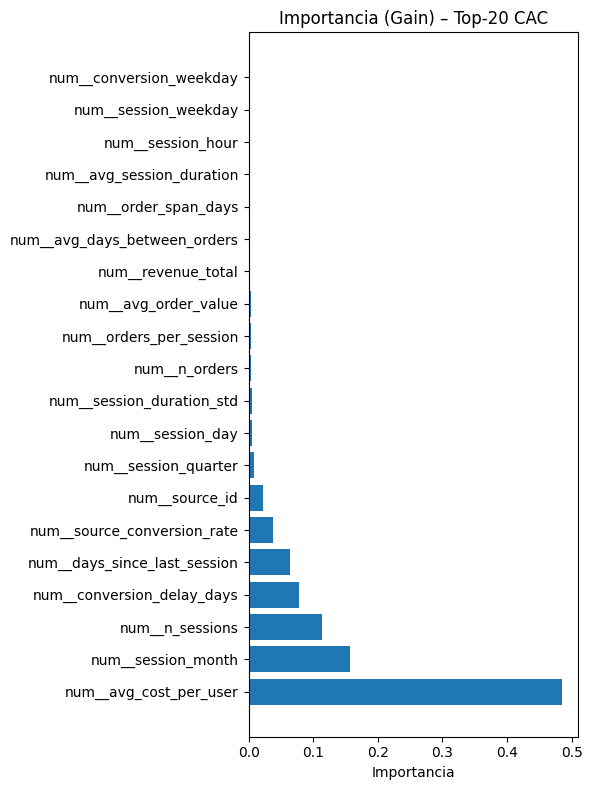

In [32]:
# Importancia de variables gain

feature_names = best_cac_model.named_steps["preprocess"].get_feature_names_out()
gain = best_cac_model.named_steps["model"].feature_importances_
idx = np.argsort(gain)[::-1][:20]

plt.figure(figsize=(6,8))
plt.barh(range(len(idx))[::-1], gain[idx])
plt.yticks(range(len(idx))[::-1], feature_names[idx])
plt.title("Importancia (Gain) – Top‑20 CAC")
plt.xlabel("Importancia")
plt.tight_layout(); plt.gca().invert_yaxis(); plt.show()


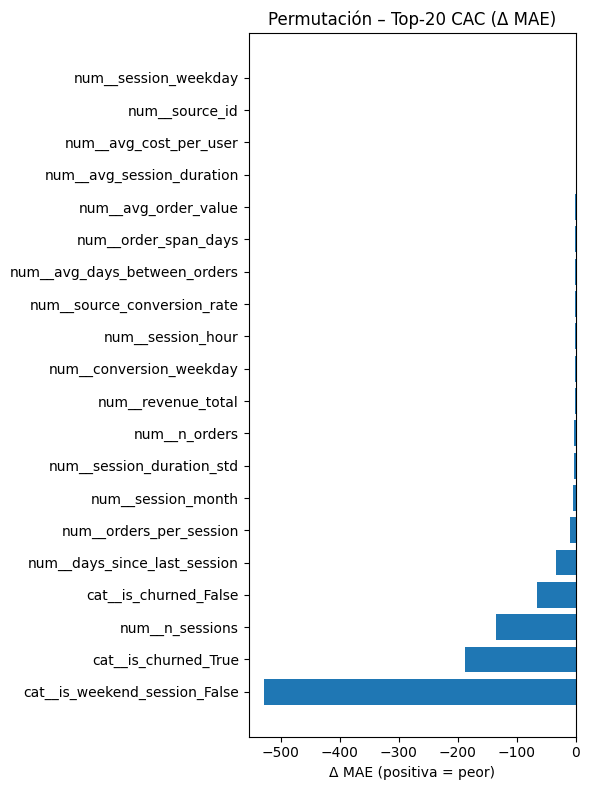

In [33]:
# Importancia de permutacion


perm = permutation_importance(
    best_cac_model, cac_X, cac_y,
    n_repeats=10,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    n_jobs=-1, random_state=42
)

idxp = np.argsort(perm.importances_mean)[::-1][:20]
plt.figure(figsize=(6,8))
plt.barh(range(len(idxp))[::-1], -perm.importances_mean[idxp])
plt.yticks(range(len(idxp))[::-1], feature_names[idxp])
plt.title("Permutación – Top‑20 CAC (Δ MAE)")
plt.xlabel("Δ MAE (positiva = peor)")
plt.tight_layout(); plt.gca().invert_yaxis(); plt.show()


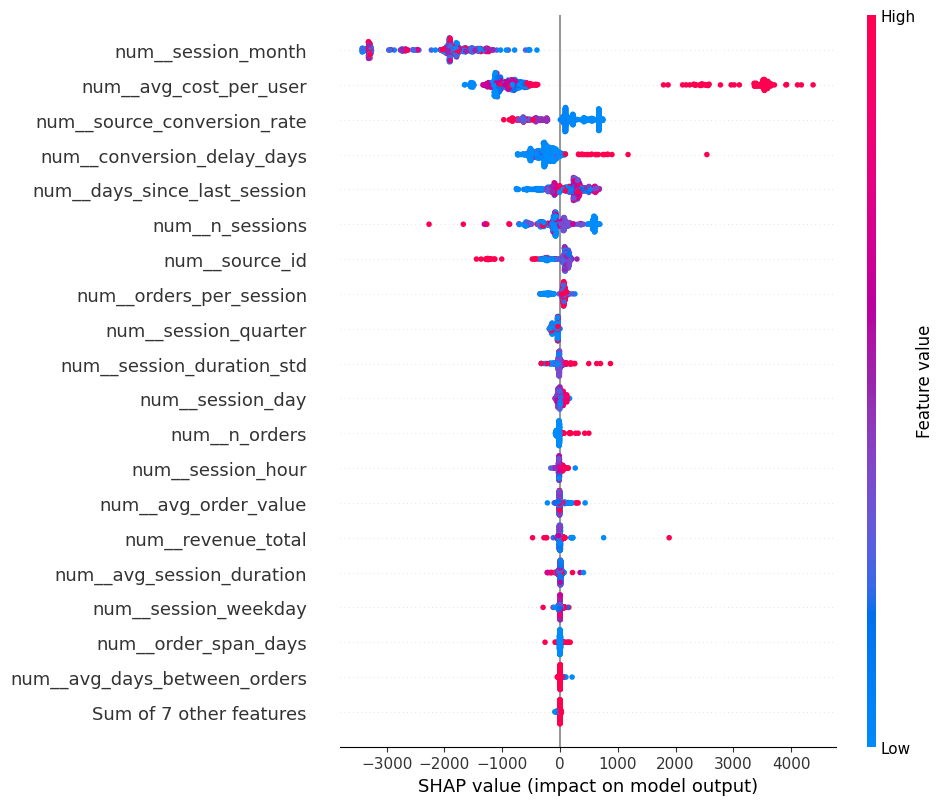

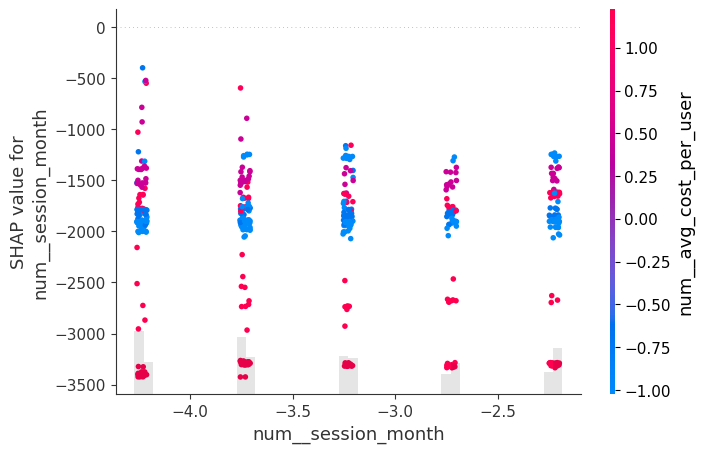

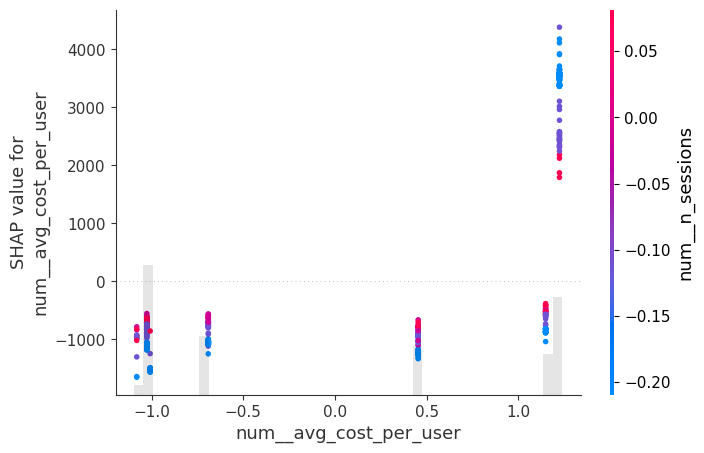

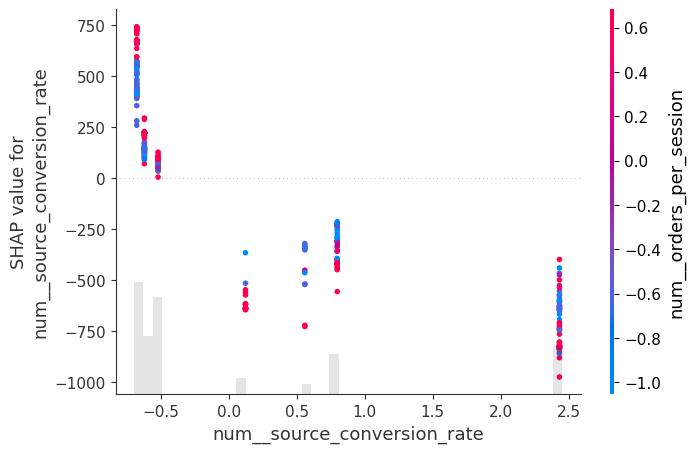

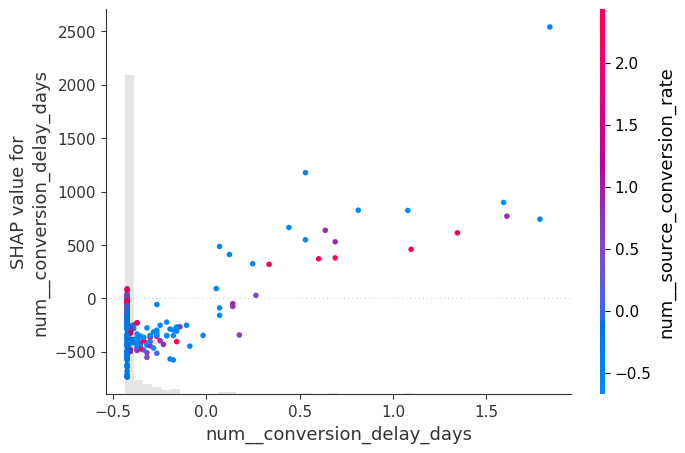

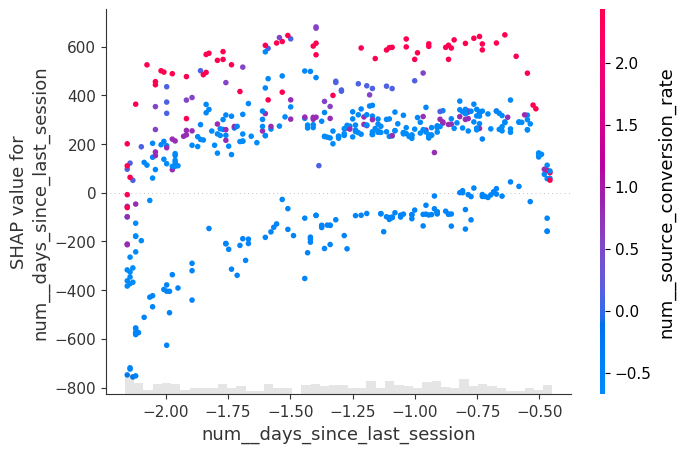

In [34]:

#  Separar pasos
pre_cac  = best_cac_model.named_steps["preprocess"]
mod_cac  = best_cac_model.named_steps["model"]

#  Muestra
X_sample_raw = cac_X.sample(n=500, random_state=42)
X_sample_num = pre_cac.transform(X_sample_raw)
feat_names   = pre_cac.get_feature_names_out()
X_sample_df  = pd.DataFrame(X_sample_num, columns=feat_names)

explainer   = shap.TreeExplainer(mod_cac)
shap_vals   = explainer(X_sample_df)

shap.plots.beeswarm(shap_vals, max_display=20)

top_idx = np.argsort(np.abs(shap_vals.values).mean(0))[::-1][:5]
for i in top_idx:
    shap.plots.scatter(shap_vals[:, i], color=shap_vals)


In [35]:
# Analisis por segmento

cac_test = cac_test.copy()
cac_test["pred"]   = best_cac_model.predict(cac_X)
cac_test["absErr"] = np.abs(cac_test["pred"] - cac_test["CAC_source_30"])

segment_cols = ["device", "source", "country"]
segment_cols = [c for c in segment_cols if c in cac_test.columns]

for col in segment_cols:
    seg = (
        cac_test.groupby(col)["absErr"]
                .mean()
                .sort_values(ascending=False)
                .to_frame("MAE_segmento")
                .head(10)
    )
    print(f"\n--- MAE por {col} ---")
    display(seg)



--- MAE por device ---


,MAE_segmento
device,
desktop,2571.012376
touch,2453.536773
